<a href="https://colab.research.google.com/github/yejin-park/MachineLearning/blob/main/D_%EC%98%81%ED%99%94_%EA%B4%80%EA%B0%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 함수에 대한 설명 추가할 것

# 영화 관객 수 데이터를 활용한 데이터 분석


> 감독, 이름, 상영등급, 스태프 수 등의 정보로 영화관객 수를 예측하는 모델



## 1. 라이브러리 및 데이터

In [5]:
import pandas as pd #판다스 패키지
import lightgbm as lgb #추가학습 필요, 그레이디언트 부스팅

In [6]:
#데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/movie/movies_train.csv') 
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/movie/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/movie/submission.csv')

#2. EDA (exploratory data analysis) 탐색적 자료분석

*   pd.DataFrame.head()/tail()
*   pd.DataFrame.shape    #head(5), tail(1)로 괄호안에 넣을게 있지만 shape는 없음
*   pd.DataFrame.info()
*   pd.DataFrame.describe() _____ #숫자형 칼럼들의 기술 통계량
*   pd.option.display.float_format = '{:.1f}'.format _____ # 2.700000e+02 와 같은 수를 원래 형태로 보고 싶은 경우
*   pd.DataFrame,groupby()
*   [11:20~] pd.DataFrame.corr() __
        pd.reset_option('display.float_format') ___ #
        train.corr() ___ #
        import seaborn as sns ___ #
        sns.heatmap(train.corr(), annot = True) ___ #



In [7]:
train.head()
#csv파일 movies_train -> train 으로 정의

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


칼럼 box_off_num : 영화별 관객 수

In [8]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [9]:
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [10]:
print("train", train.shape)
print("test", test.shape)
print("submission", submission.shape)

train (600, 12)
test (243, 11)
submission (243, 2)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [12]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [13]:
#2.700000e+02 와 같은 수를 원래 형태로 보고싶은 경우
pd.options.display.float_format = '{:.1f}'.format
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [14]:
### 장르별 관객수 ### + 평균값(mean)을 내서 정렬을 시킨다
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [15]:
# pd.options.display.float_format = '{:.1f}'.format 으로 
# 2.700000e+02 -> 270.0 숫자변형 한 것을 복원

pd.reset_option('display.float_format')

In [16]:
#corr : 두 컬럼에 대한 상관계수...를 숫자형태로 표현
train.corr() 

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


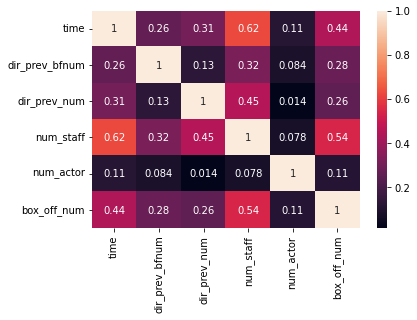

In [17]:
### corr을 통해 수치로만 보기에는 직관적이지 않음 ###
### -> 그림으로 시각적 #seaborn #heatmap

import seaborn as sns
sns.heatmap(train.corr(), annot = True)

영화별 관객수 box_off_num 에는 [스태프 수 num_staff 또는 상영 시간 time] 가 영향을 많이 받음

#3. 데이터 전처리 Data Cleansing & Pre-Processing

*   pd.Series.isna() ____ # DataFrame vs Series 차이만 인식 / True(1) 
        train.isna().sum() / 600 ___ #
        train[train['dir_prev_bfnum'].isna()] ___ #train['dir_prev_bfnum] 만 있으면?
        train[train['dir_prev_bfnum'].isna()['dir_prev_num']

*   pd.DataFrame.fillna() ____ # Series라고 생각했는데..?

 

In [18]:
train.isna().sum() / 600

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [19]:
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [20]:
# dir_prev_bfnum 칼럼의 수가 NaN인 경우, 관객 수가 알려지지 않은 것이라 판단
# : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수
train['dir_prev_bfnum'].fillna(0, inplace = True)

In [21]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [22]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [23]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [24]:
test.isna().sum() / 600

title             0.0
distributor       0.0
genre             0.0
release_time      0.0
time              0.0
screening_rat     0.0
director          0.0
dir_prev_bfnum    0.0
dir_prev_num      0.0
num_staff         0.0
num_actor         0.0
dtype: float64

#4. 변수 선택 및 모델 구축 
Feature Engineering & Initial Modeling

*   model = lgb.LGBMRegressor(random_state= 숫자, n_estimators= 숫자)
        LGBMRegressor 설명필요

*   항목 추가



X (상영 시간, 영화 제작에 참여한 스태프 수, 배우 수...) -> model -> Y(영화 관객 수)

훈련 시, 사이킷런 : .fit / lightGBM :  .train 으로 다름 

그래서 LGBM"Regressor"로 통일

In [28]:
#import lightbgm as lgb
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [29]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']

In [30]:
X_train, X_test, y_train = train[features], test[features], train[target]

##5. 모델 학습 및 검증 (Model Tuning & Evaluation)

*   lightGBM (base model)
*   k-fold  lightGBM (k-fold model)
*   feature engineering (fe)
*   grid search (hyperparameter tuning)



##LightGBM

*   부스팅 모델
*   기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습 이어나감
*   타 부스팅 모델에 비해 속도가 빠름

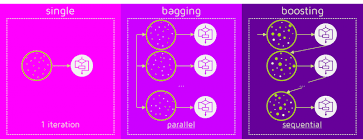

